### Initialization

In [1]:
import sys, os
sys.path.append(os.getenv('VIRTUAL_ENV')+'/lib/python3.8/site-packages/')
import curves as c
import matplotlib.pyplot as plt
pc=1e-2
year = 1
month = year/12
day = month/30
week = 7*day

In [2]:
def add_eur_libor_quotes_1(curve):
    # https://www.global-rates.com/en/interest-rates/libor/libor.aspx
    
    # date: 06-25-2021
    data = [
        {'t0':0, 'length': 1*day,   'rate': -0.58471*pc},
        {'t0':0, 'length': 1*week,  'rate': -0.57571*pc},
        {'t0':0, 'length': 1*month, 'rate': -0.57786*pc},
        {'t0':0, 'length': 2*month, 'rate': -0.55857*pc},
        {'t0':0, 'length': 3*month, 'rate': -0.54614*pc},
        {'t0':0, 'length': 6*month, 'rate': -0.52614*pc},
        {'t0':0, 'length': 1*year,  'rate': -0.48357*pc},
    ]
    for v in data:
        curve.Add(c.ForwardRateAgreement(v['t0'],v['length'],v['rate']))

In [3]:
def add_eur_libor_quotes_2(curve):
    # https://www.chathamfinancial.com/technology/european-market-rates
    
    # date: 06-25-2021
    data = [
        {'t0':0, 'length': 1*month, 'rate': -0.56200*pc},
        {'t0':0, 'length': 3*month, 'rate': -0.53800*pc},
        {'t0':0, 'length': 6*month, 'rate': -0.51300*pc},
        {'t0':0, 'length': 1*year,  'rate': -0.47800*pc},
    ]
    for v in data:
        curve.Add(c.ForwardRateAgreement(v['t0'],v['length'],v['rate']))

In [4]:
def add_fras(curve):
    libor_quotes = [
        {'t0': 0, 'length': 1*month, 'rate':-0.553*pc},
        {'t0': 0, 'length': 3*month, 'rate':-0.540*pc},
        {'t0': 0, 'length': 6*month, 'rate':-0.508*pc},
        {'t0': 0, 'length': 1*year,  'rate':-0.477*pc},
    ]
    for v in libor_quotes:
        curve.Add(c.ForwardRateAgreement(v['t0'],v['length'],v['rate']))

In [5]:
def add_swaps(curve,curve_float_leg=None):
    if curve_float_leg is None:
        curve_float_leg = curve
    t0 = 0
    dt = year*0.25
    swaps = {
         1*year:  0.19*pc,
         2*year:  0.32*pc,
         3*year:  0.55*pc,
         5*year:  0.93*pc,
         7*year:  1.20*pc,
        10*year:  1.45*pc,
        15*year:  1.53*pc,
        30*year:  1.78*pc
    }
    for period,rate in swaps.items():

        swap = c.Swap()

        # fixed rate: payed quartely
        swap.lfix = c.LegFixed(t0,dt,round(period/dt),rate)

        # floating rate: payed quartely
        dt = year*0.25

        swap.lflt = c.LegFloat(t0,dt,round(period/dt),curve_float_leg)
        curve.Add(swap)

In [6]:
curve = c.YieldCurve()
# https://www.global-rates.com/en/interest-rates/libor/libor.aspx

# date: 06-25-2021
data = [
    {'t0':0, 'length': 1*day,   'rate': -0.58471*pc},
    {'t0':0, 'length': 1*week,  'rate': -0.57571*pc},
    {'t0':0, 'length': 1*month, 'rate': -0.57786*pc},
    {'t0':0, 'length': 2*month, 'rate': -0.55857*pc},
    {'t0':0, 'length': 3*month, 'rate': -0.54614*pc},
    {'t0':0, 'length': 6*month, 'rate': -0.52614*pc},
    {'t0':0, 'length': 1*year,  'rate': -0.48357*pc},
]
for v in data:
    fra = c.ForwardRateAgreement(v['t0'],v['length'],v['rate'])
    fra.AddToCurve(curve)

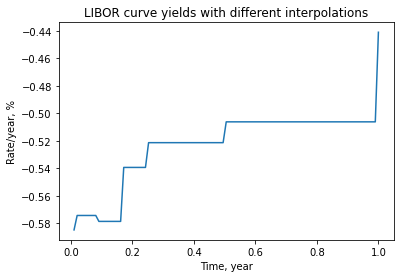

In [7]:
points=100
vx = [(curve.GetMaturity()*i)/(points-1) for i in range(points)]

fig, ax = plt.subplots()
ax.set_xlabel('Time, year')
ax.set_ylabel('Rate/year, %')

vy = [curve(t)/pc for t in vx]
ax.plot(vx,vy)
# ax.plot(vx,vy2,':',label='cspline')
#ax.legend(loc='upper center', shadow=True)
plt.title('LIBOR curve yields with different interpolations')
plt.show()


In [8]:
curve.Print()

In [9]:
curve2 = c.YieldCurve()
#add_eur_libor_quotes_1(curve2)
for v in data:
    fra = c.ForwardRateAgreement(v['t0'],v['length'],v['rate'])
    curve2.Add(fra)
#curve2.Build(c.Interpolator1D.Type.PiecewiseConstant)

In [10]:
curve2.Build(c.Interpolator1D.Type.PiecewiseConstant)

YieldCurve

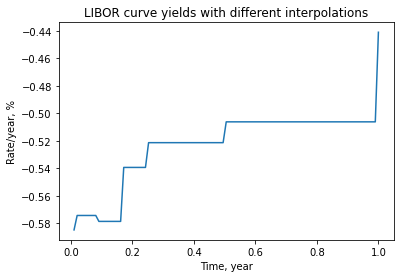

In [11]:
points=100
vx = [(curve2.GetMaturity()*i)/(points-1) for i in range(points)]

fig, ax = plt.subplots()
ax.set_xlabel('Time, year')
ax.set_ylabel('Rate/year, %')

vy = [curve2(t)/pc for t in vx]
ax.plot(vx,vy)
# ax.plot(vx,vy2,':',label='cspline')
#ax.legend(loc='upper center', shadow=True)
plt.title('LIBOR curve yields with different interpolations')
plt.show()
